<a href="https://colab.research.google.com/github/MaryAdewunmi/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split



***Importing dataset***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_test.csv to loan_test.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_train.csv to loan_train.csv


In [ ]:
df=pd.read_csv('loan_test.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df1=pd.read_csv('loan_train.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


***Data Cleaning***

In [ ]:
df.shape

(367, 12)

In [ ]:
df1.shape

(614, 13)

In [ ]:
df.isnull

<bound method DataFrame.isnull of       Loan_ID Gender Married  ... Loan_Amount_Term Credit_History Property_Area
0    LP001015   Male     Yes  ...            360.0            1.0         Urban
1    LP001022   Male     Yes  ...            360.0            1.0         Urban
2    LP001031   Male     Yes  ...            360.0            1.0         Urban
3    LP001035   Male     Yes  ...            360.0            NaN         Urban
4    LP001051   Male      No  ...            360.0            1.0         Urban
..        ...    ...     ...  ...              ...            ...           ...
362  LP002971   Male     Yes  ...            360.0            1.0         Urban
363  LP002975   Male     Yes  ...            360.0            1.0         Urban
364  LP002980   Male      No  ...            360.0            NaN     Semiurban
365  LP002986   Male     Yes  ...            360.0            1.0         Rural
366  LP002989   Male      No  ...            180.0            1.0         Rural

[367 

In [ ]:
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)


In [ ]:
missed_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missed_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


***This showed that Loan_status,Property_Area ,Coapplicantincome,Applicantincome,Education and Loan_ID have empty values***

In [ ]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].dropna().mode().values[0])

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0])

In [ ]:
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0])

In [ ]:
df1['Married'] = df1['Married'].fillna(df1['Married'].dropna().mode().values[0])

In [ ]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0])

In [ ]:
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].dropna().mode().values[0])

In [ ]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0])

In [ ]:
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].dropna().mode().values[0])

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().mode().values[0])

In [ ]:
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].dropna().mode().values[0])

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0])

In [ ]:
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].dropna().mode().values[0])

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0])

In [ ]:
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].dropna().mode().values[0])

In [ ]:
df1['Loan_Status'] = df1['Loan_Status'].fillna(df1['Loan_Status'].dropna().mode().values[0])

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [ ]:
total1 = df1.isnull().sum().sort_values(ascending=False)
percent1 = (df1.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [ ]:
missed_data1 = pd.concat([total1, percent1], axis=1, keys=['Total', 'Percent'])
missed_data1.head(20)

,Total,Percent
Loan_Status,0,NaN
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


***Data Visualization***

In [ ]:
import seaborn as sns

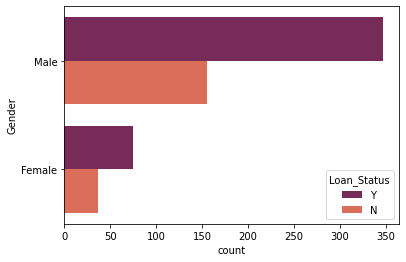

In [48]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', palette = 'rocket', color = 'k', data = df1)

***This figure shows that Male collects Loans more than Female***

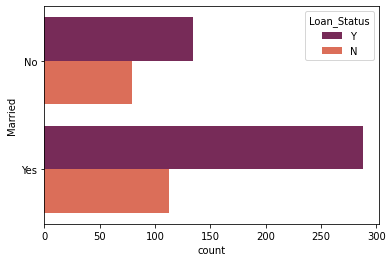

In [47]:
sns.countplot(y = 'Married', hue = 'Loan_Status', palette = 'rocket', color = 'k', data = df1)

***This figure above shows that Married people collects loans more than Singles***

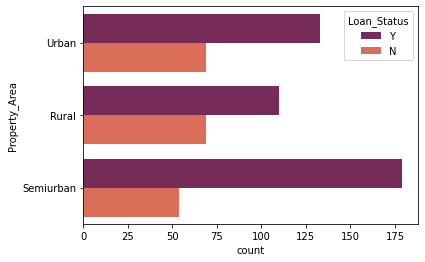

In [46]:
sns.countplot(y = 'Property_Area', hue = 'Loan_Status',  palette = 'rocket', color = 'k', data = df1)

***This figure above shows that People that lives in the Semi-Urban collects loans more than people living in Urban and Rural areas***.

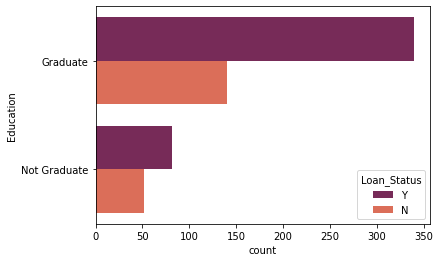

In [45]:
sns.countplot(y = 'Education', hue = 'Loan_Status', palette = 'rocket', color = 'k', data = df1)


***This figure shows that Graduates collects loan more than Non-Graduates***

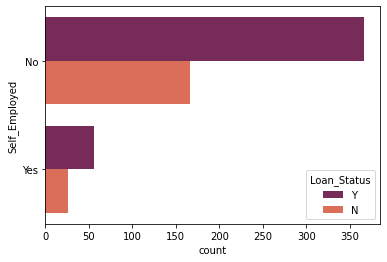

In [44]:
sns.countplot(y = 'Self_Employed', palette = 'rocket', color = 'k', hue = 'Loan_Status', data = df1)

***This shows that People that are not self-employed collects loan more than Self-Employed.***

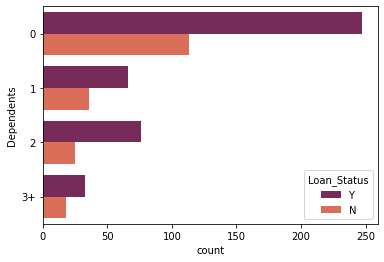

In [43]:
sns.countplot(y = 'Dependents', palette = 'rocket', color = 'k', hue = 'Loan_Status', data = df1)

***People who do not have dependants collects loan than people with 1 to 3 dependents.This is interesting..Just thinking loud***

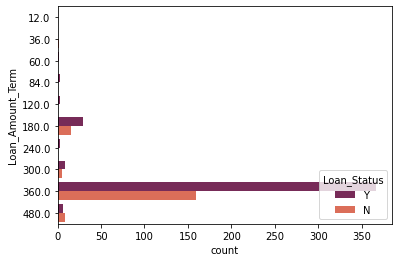

In [42]:
sns.countplot(y = 'Loan_Amount_Term', hue = 'Loan_Status', palette = 'rocket', color = 'k', data = df1)

***People prefer loan term that within a year than the rest***